<a href="https://colab.research.google.com/github/jiruneko/Python_MachineLearning/blob/main/Python_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

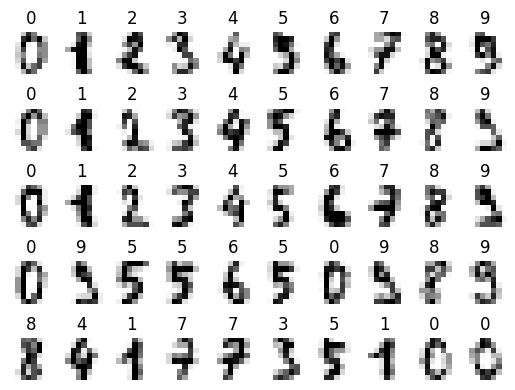

In [ ]:
import sklearn.datasets
import matplotlib.pyplot as plt

digits = sklearn.datasets.load_digits()

for i in range(50):
  plt.subplot(5, 10, i + 1)
  plt.axis("off")
  plt.title(digits.target[i])
  plt.imshow(digits.images[i], cmap="Greys")

plt.show()

In [ ]:
import sklearn.datasets
import sklearn.svm
import PIL.Image
import numpy

# 画像ファイルを数値リストに変換する
def imageToData(filename):
  # 画像を8*8のグレースケールに変換
  grayImage = PIL.Image.open(filename).convert("L")
  grayImage = grayImage.resize((8, 8), PIL.Image.Resampling.LANCZOS)
  # 数値リスト
  numImage = numpy.asarray(grayImage, dtype = float)
  numImage = 16 - numpy.floor(17 * numImage / 256)
  numImage = numImage.flatten()

  return numImage

# 数字を予測する
def predictDigits(data):
  # 学習用データを読み込む
  digits = sklearn.datasets.load_digits()
  clf = sklearn.svm.SVC(gamma = 0.001)
  clf.fit(digits.data, digits.target)
  # 予測結果を表示
  n = clf.predict([data])
  print("予測=", n)

# 画像ファイルを数値リストに変換する
data = imageToData("2.png")
predictDigits(data)

予測= [2]


In [ ]:
def imageToData(filename):
  grayImage = PIL.Image.open(filename).convert("L")
  grayImage = grayImage.resize((8, 8), PIL.Image.Resampling.LANCZOS)
  # 数値リストに変換
  numImage = numpy.asarray(grayImage,dtype = float)
  numImage = 16 - numpy.floor(17 * numImage / 256)
  numImage = numImage.flatten()

  return numImage

In [ ]:
def predictDigits(data):
  digits = sklearn.datasets.load_digits()
  clf = sklearn.svm.SVC(gamma = 0.001)
  clf.fit(digits.data, digits.target)
  n = clf.predict([data])
  print("予測=", n)

Saving 2.png to 2 (1).png


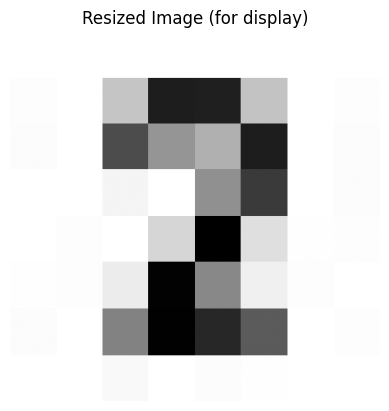

変換された画像データ: [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 13.  5.  5. 13. 16. 16. 16. 16.
  7. 11. 12.  5. 16. 16. 16. 16. 16. 16. 11.  6. 16. 16. 16. 16. 16. 14.
  3. 15. 16. 16. 16. 16. 16.  3. 10. 16. 16. 16. 16. 16. 10.  3.  5.  8.
 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]


In [ ]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# ユーザーに画像ファイルをアップロードしてもらう
uploaded = files.upload()

# 最初のファイル名を取得
filename = list(uploaded.keys())[0]

# 画像を読み込んで表示
grayImage = Image.open(filename).convert("L")
grayImage = grayImage.resize((8, 8), Image.Resampling.LANCZOS)

# 表示用に拡大して表示
displayImage = grayImage.resize((300, 300), resample=0)
plt.imshow(displayImage, cmap="gray")
plt.title("Resized Image (for display)")
plt.axis("off")
plt.show()

# データに変換
inverted = ImageOps.invert(grayImage)
numImage = np.asarray(inverted, dtype=float)
numImage = 16 - np.floor(17 * numImage / 256)
flattened = numImage.flatten()

print("変換された画像データ:", flattened)

In [ ]:
import tkinter as tk
import tkinter.filedialog as fd
import PIL.Image
import PIL.ImageTk

import sklearn.datasets
import sklearn.svm
import numpy

def imageToData(filename):
  grayImage = PIL.Image.open(filename).convert("L")
  grayImage = grayImage.resize((8,8), PIL.Image.Resampling.LANCZOS)

  dispImage = PIL.ImageTk.PhotoImage(grayImage.resize((300,300),resample=0))
  imageLabel.configure(image = dispImage)
  imageLabel.image = dispImage

  numImage = numpy.asarray(grayImage, dtype = float)
  numImage = 16 - numpy.floor(17 * numImage / 256)
  numImage = numImage.flatten()
  return numImage